INTRODUCTION

In [1]:
#What is Home Credit?

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Uploading all the tables

In [4]:
appl_train = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/application_train.csv')
appl_test = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/application_test.csv')
bureau_bal = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/bureau_balance.csv')
bureau = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/bureau.csv')
cc_balance = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/credit_card_balance.csv')
pos = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/POS_CASH_balance.csv')
previous_appl = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/previous_application.csv')
sample_submission = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/sample_submission.csv')

In [5]:
appl_train = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/application_train.csv')

In [6]:
appl_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
A= appl_train.dtypes

In [8]:
A.head(100)

SK_ID_CURR                  int64
TARGET                      int64
NAME_CONTRACT_TYPE         object
CODE_GENDER                object
FLAG_OWN_CAR               object
                           ...   
DAYS_LAST_PHONE_CHANGE    float64
FLAG_DOCUMENT_2             int64
FLAG_DOCUMENT_3             int64
FLAG_DOCUMENT_4             int64
FLAG_DOCUMENT_5             int64
Length: 100, dtype: object

In [9]:
appl_train.shape ##307511 observations (each one a separate loan) and 122 features (variables) 
                 ##including the TARGET (the label we want to predict).

(307511, 122)

In [10]:
appl_train['TARGET'].value_counts() #highly imbalenced data

0    282686
1     24825
Name: TARGET, dtype: int64

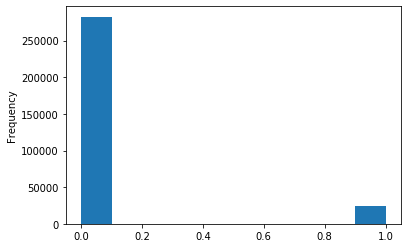

In [11]:
appl_train['TARGET'].astype(int).plot.hist() #try and make a pie chart to see 
                                             ##the percangage of the difference

In [12]:
##cheking for the null values

In [13]:
appl_train.head()
pd.set_option('display.max_columns',100)

In [148]:
null_val = appl_train.isnull().sum
percent = (100 * appl_train.isnull().sum() / len(appl_train)).sort_values(ascending=False)
percent.head(25)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_MODE           58.515956
BASEMENTAREA_AVG            58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
dtype: float64

In [15]:
#fix missing values
appl_train['OCCUPATION_TYPE'] = appl_train['OCCUPATION_TYPE'].fillna('Un')

In [16]:
appl_train['DAYS_EMPLOYED'] = appl_train['DAYS_EMPLOYED'].fillna(0)

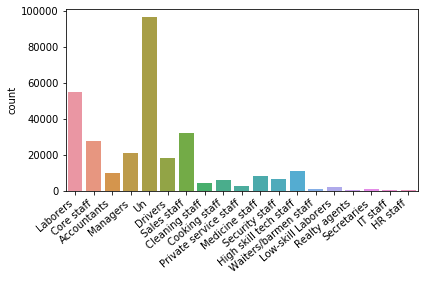

In [17]:
ax= sns.countplot(appl_train.OCCUPATION_TYPE.values, data=appl_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [18]:
#starting points, vizs, pattern

In [19]:
appl_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

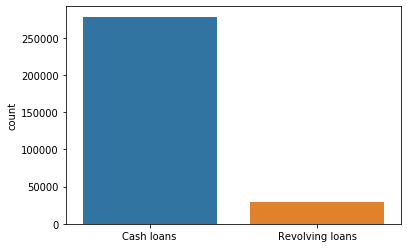

In [20]:
sns.countplot(appl_train.NAME_CONTRACT_TYPE.values, data =appl_train)

#distribution of loans

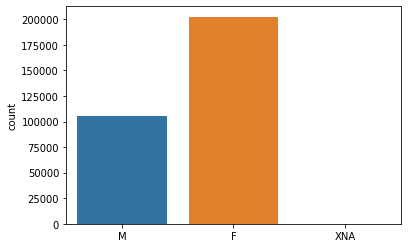

In [21]:
sns.countplot(appl_train.CODE_GENDER.values, data = appl_train)

#majority of applicats are females

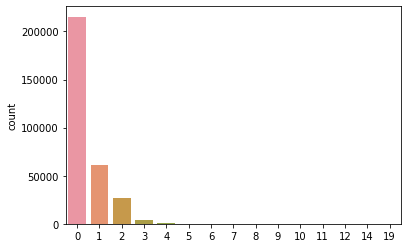

In [22]:
sns.countplot(appl_train.CNT_CHILDREN.values, data= appl_train)

#most applicants don't have children

In [23]:
not_paid = appl_train.loc[appl_train['TARGET'] == 0]

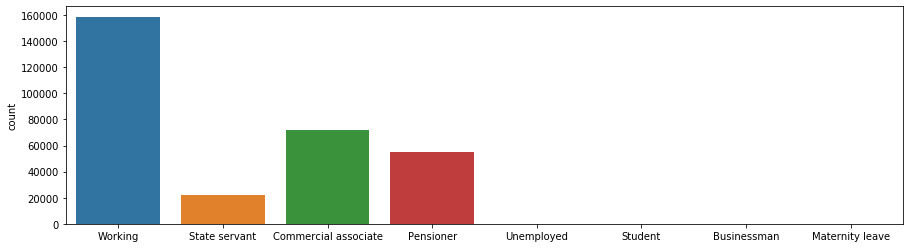

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(appl_train.NAME_INCOME_TYPE.values, data=appl_train)
#clearly most applicants are working, but how do i compare groups with 
#the target

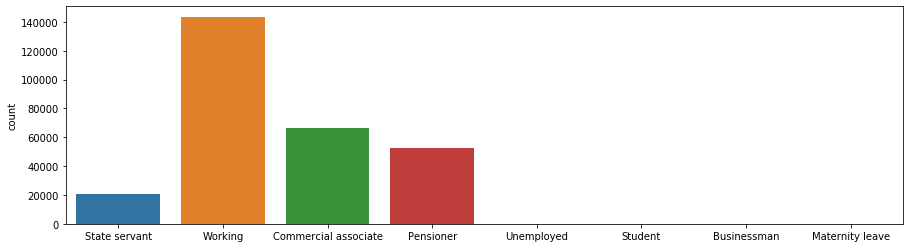

In [25]:
plt.figure(figsize=(15,4))
sns.countplot(not_paid.NAME_INCOME_TYPE.values, data=not_paid)

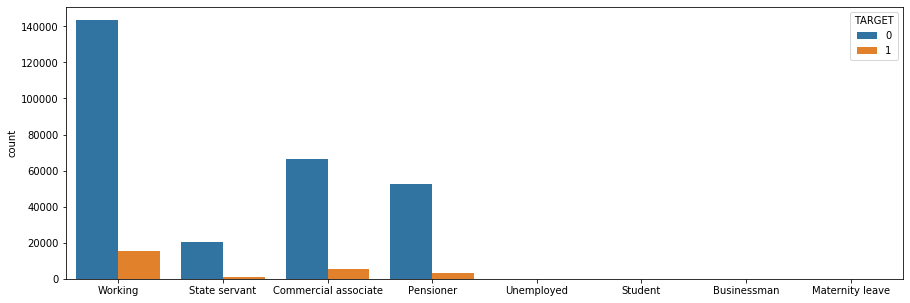

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(appl_train.NAME_INCOME_TYPE.values,data=appl_train,hue=appl_train.TARGET)
plt.show()

#distribution of paid/unpaid loans represented by the income type of applicants


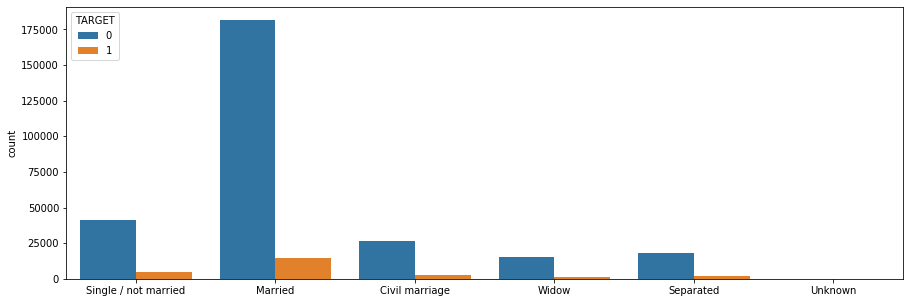

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(appl_train.NAME_FAMILY_STATUS.values,data=appl_train,hue=appl_train.TARGET)
plt.show()


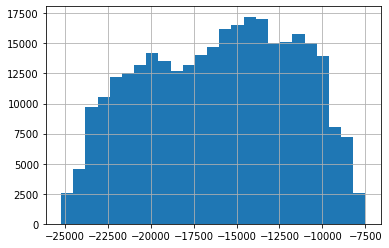

In [81]:

appl_train['DAYS_BIRTH'].hist(bins=25)
#clients age in days at the time of the application?? Why is it negative?

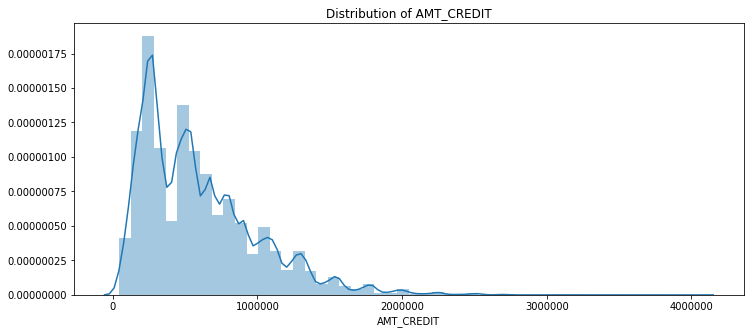

In [82]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_CREDIT")
ax = sns.distplot(appl_train["AMT_CREDIT"])

#Credit Amount of the Loan distribution

In [83]:
appl_train.REGION_RATING_CLIENT_W_CITY.isnull().sum()

0

In [84]:
corr = appl_train.corr()['TARGET'].sort_values()
top10_corr = pd.concat([corr[:15], corr[-15:]])
top10_corr

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.034199
ELEVATORS_MEDI                -0.033863
FLOORSMIN_AVG                 -0.033614
FLOORSMIN_MEDI                -0.033394
LIVINGAREA_AVG                -0.032997
LIVINGAREA_MEDI               -0.032739
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457


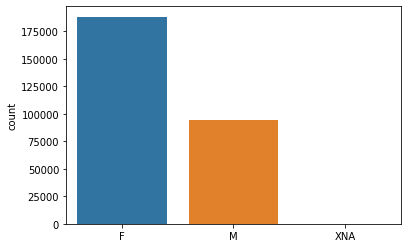

In [95]:
sns.countplot(not_paid.CODE_GENDER.values, data=not_paid)

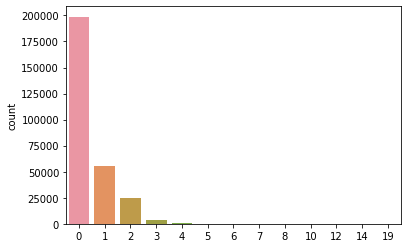

In [96]:

sns.countplot(not_paid.CNT_CHILDREN.values, data=not_paid)

In [97]:
m = appl_train.loc[appl_train['CODE_GENDER'] == 'M']

In [98]:
m.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,1.745205,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,...,0.025,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,0.616438,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,8.323288,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,4.350685,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,1.230137,-4597.0,-2379,8.0,1,1,1

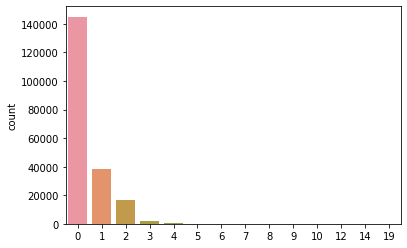

In [99]:
sns.countplot(f.CNT_CHILDREN.values, data=f)

Text(0.5, 0, 'Days Employment')

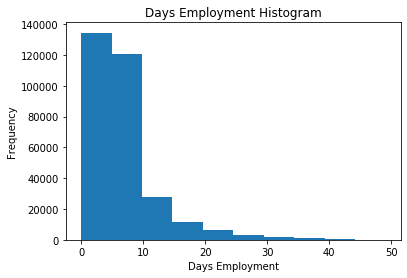

In [100]:
appl_train['DAYS_EMPLOYED'].replace({365243: -2384}, inplace = True)
appl_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

In [101]:
appl_train['DAYS_EMPLOYED']=appl_train['DAYS_EMPLOYED']/(-365)

In [102]:
appl_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-0.004781,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-0.008917,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-0.001689,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-0.022811,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondar

Text(0.5, 0, 'Years Employed')

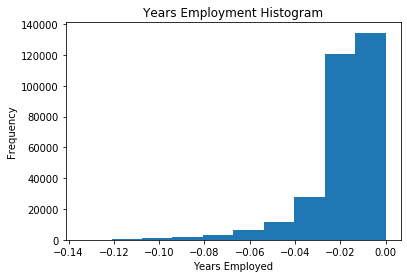

In [103]:
appl_train['DAYS_EMPLOYED'].plot.hist(title = 'Years Employment Histogram');
plt.xlabel('Years Employed')

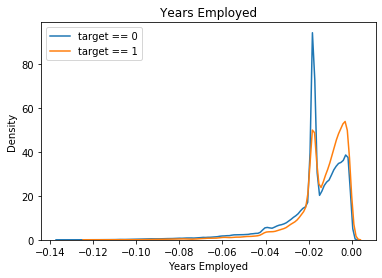

In [106]:
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'DAYS_EMPLOYED'] , label = 'target == 0')
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'DAYS_EMPLOYED'] , label = 'target == 1')
plt.xlabel('Years Employed'); plt.ylabel('Density'); plt.title('Years Employed');

In [ ]:
appl_train['DAYS_BIRTH'].describe()

In [ ]:
not_paid['DAYS_EMPLOYED'].plot.hist(title = 'Days Employed Histogram');
plt.xlabel('Days Employed')

#the higher you're employed, the lower is the risk of default.

In [ ]:
paid = appl_train.loc[appl_train['TARGET'] == 0]

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(not_paid.NAME_FAMILY_STATUS.values,data=paid,hue=not_paid.CODE_GENDER)
plt.show()

In [ ]:
#paid unpaid w/m,s/m

In [ ]:
a = appl_train.groupby('TARGET').size()
#a = df['bins'].value_counts()
print (a)
a.plot.pie(figsize=(4,4))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [ ]:
a = paid.groupby('CODE_GENDER').size()
#a = df['bins'].value_counts()
print (a)
a.plot.pie(figsize=(4,4))

#66% females paid on time

In [ ]:
a = not_paid.groupby('CODE_GENDER').size()
#a = df['bins'].value_counts()
print (a)
a.plot.pie(figsize=(4,4))

#57% of females defaulted

In [ ]:
a = f.groupby('NAME_FAMILY_STATUS').size()
print (a)
a.plot.pie(figsize=(4,4))

In [ ]:
not_paid.groupby(by="CODE_GENDER").sum()

In [ ]:
plt.hist(m['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

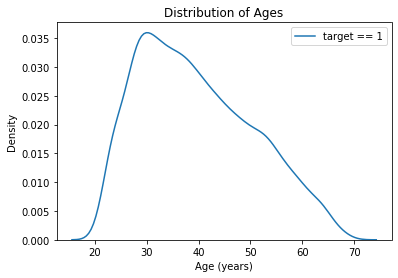

In [107]:

sns.kdeplot(m.loc[appl_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

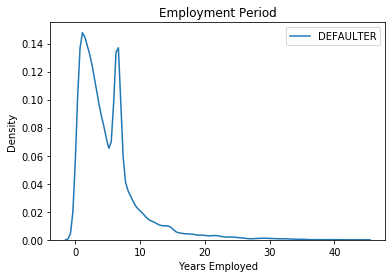

In [113]:

sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'DAYS_EMPLOYED'] * -365, label = 'DEFAULTER')
plt.xlabel('Years Employed'); plt.ylabel('Density'); plt.title('Employment Period');

In [ ]:
#As can be seen, the non-return rate is higher for young people and decreases 
#with increasing age.

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

In [ ]:
cat_perc = appl_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

In [ ]:
ext_data = appl_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


In [114]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = appl_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of Loans': temp.values})
    cat_perc = appl_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,14))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,18))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of Loans",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=40)
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=40)
    plt.ylabel('Number of Loans', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=20)

    plt.show();

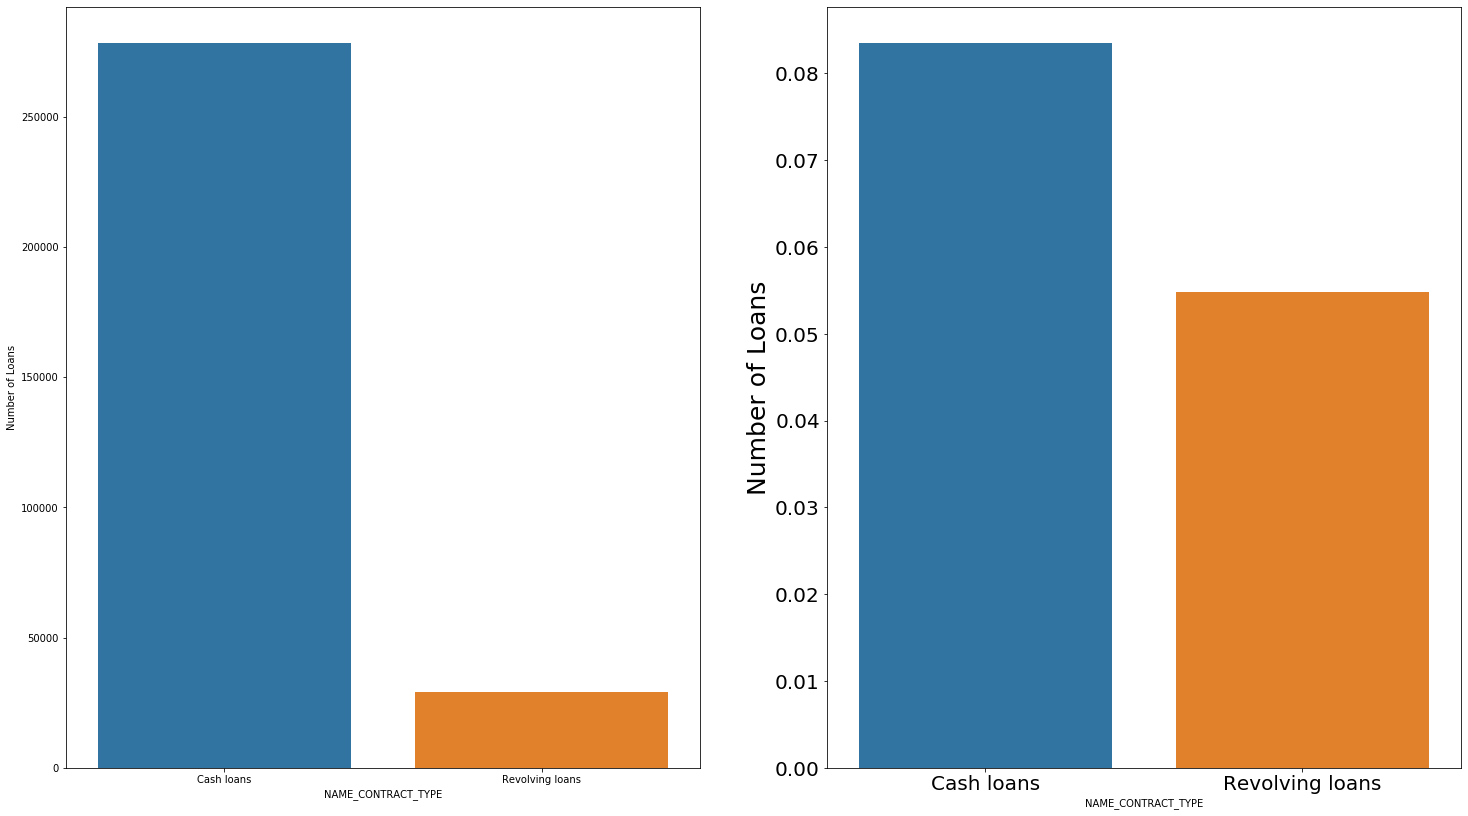

In [115]:
plot_stats('NAME_CONTRACT_TYPE', False)

In [116]:
#revolving loans (probably overdrafts or something like that) make up less
#than 10% of the total number of loans. At the same time, the percentage of no return among them is much higher. 

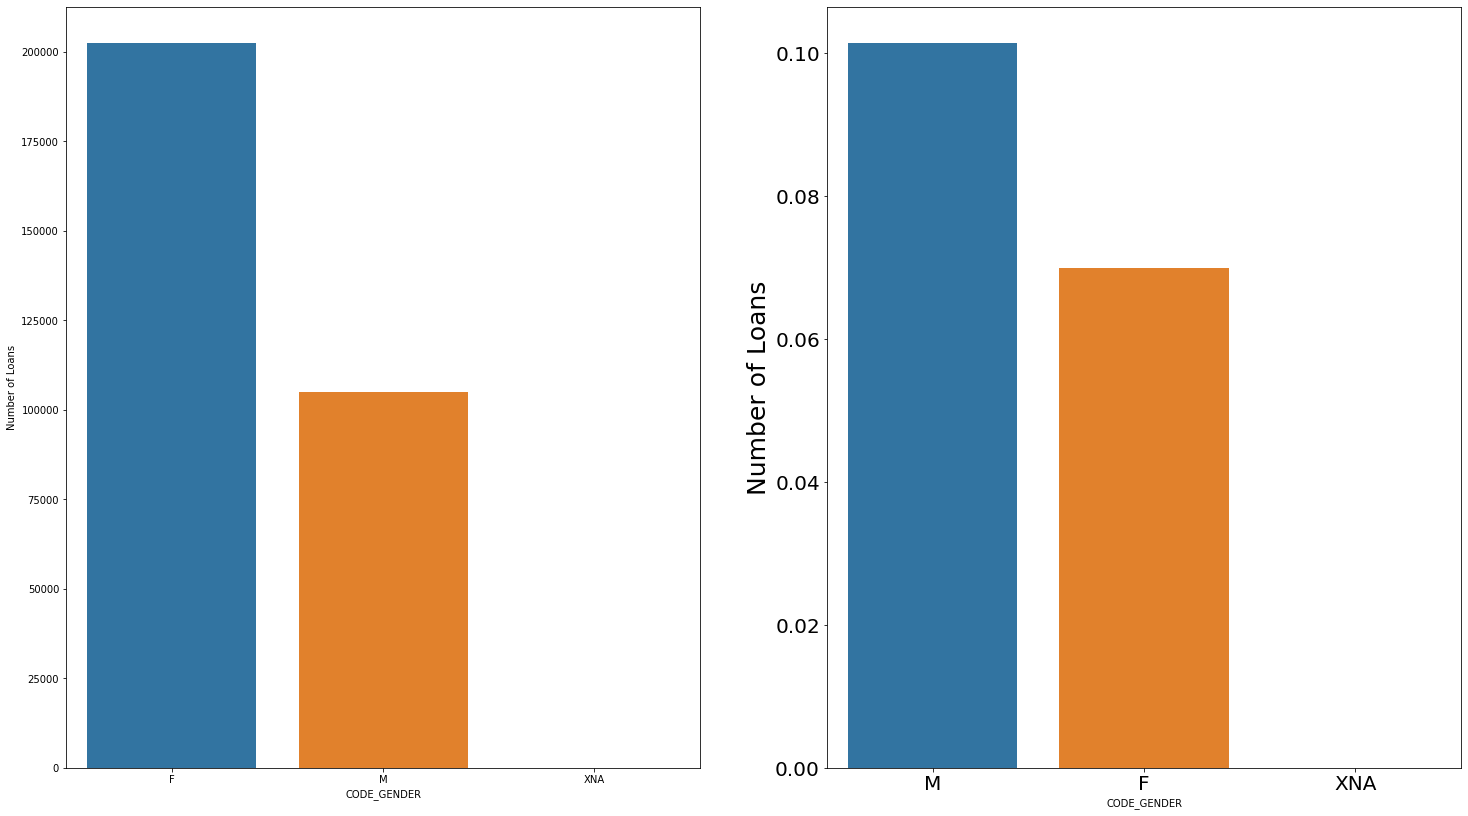

In [117]:
plot_stats('CODE_GENDER')

In [118]:
#Women clients are almost twice as many men, while men show a much higher 
#risk.

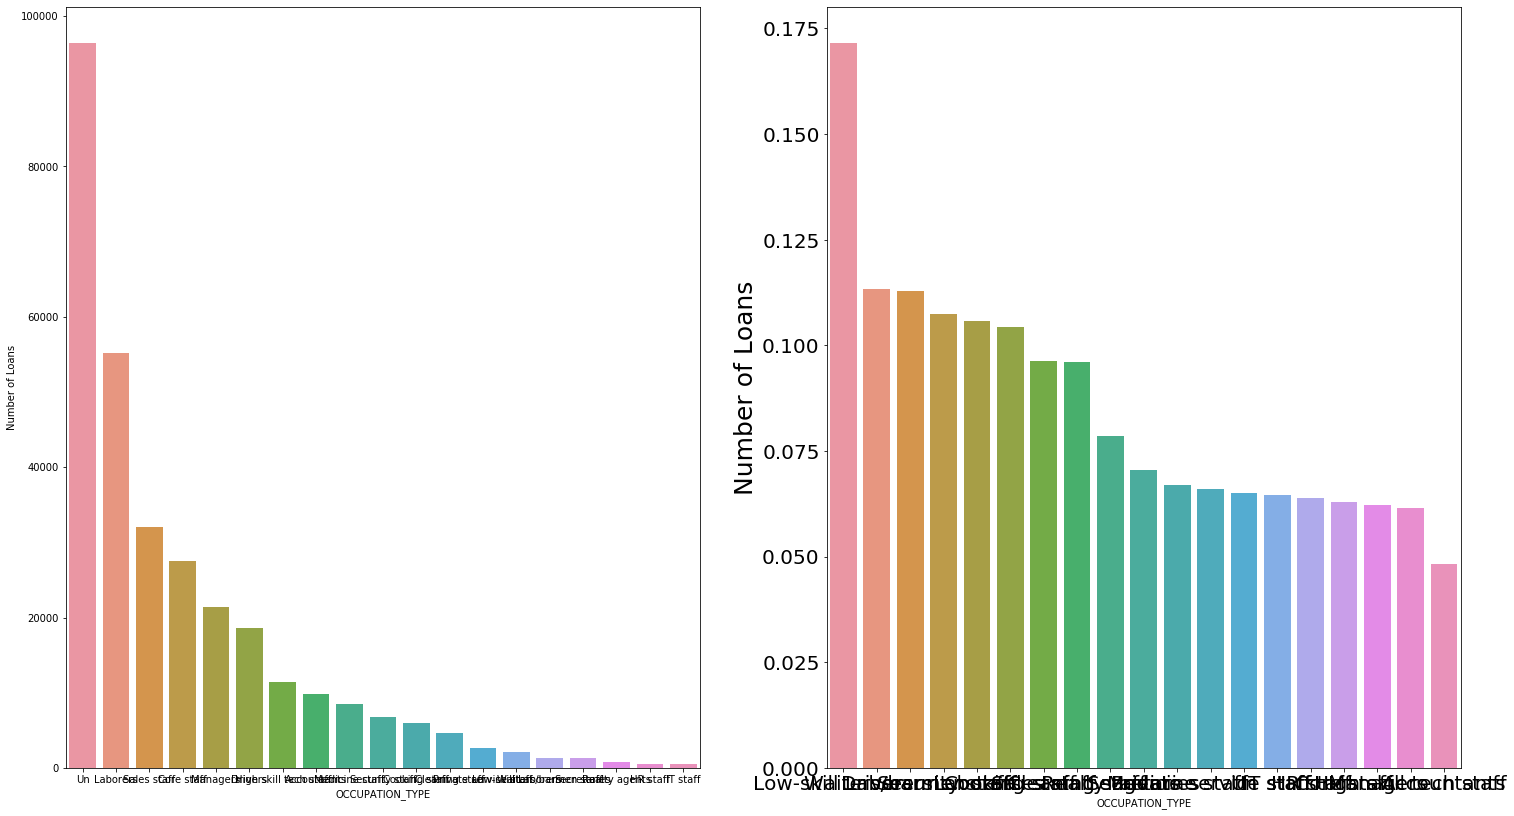

In [126]:
plot_stats('OCCUPATION_TYPE')

In [120]:
#Most customers don't have any children. At the same time, customers with 
#9 and 11 children show complete non-return.

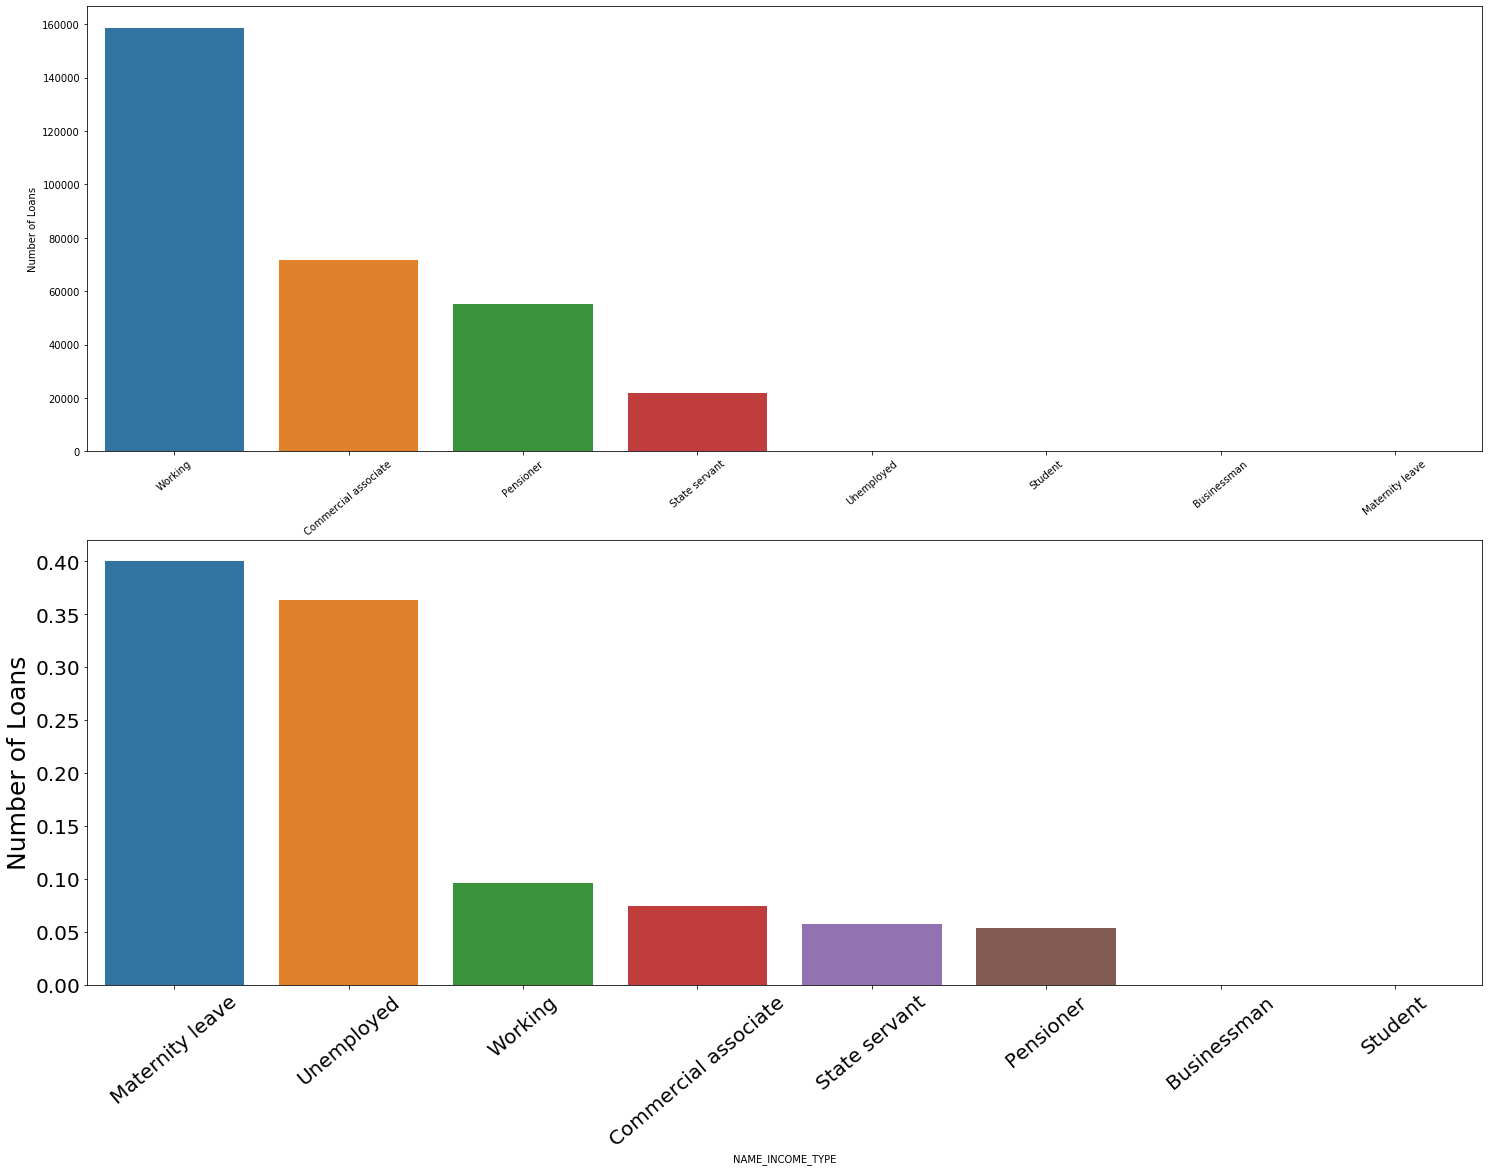

In [121]:
plot_stats('NAME_INCOME_TYPE', True, False)

In [122]:
#Single mothers and the unemployed are likely to be cut off at the application 
#stage - there are too few of them in the sample. But consistently show 
#problems.

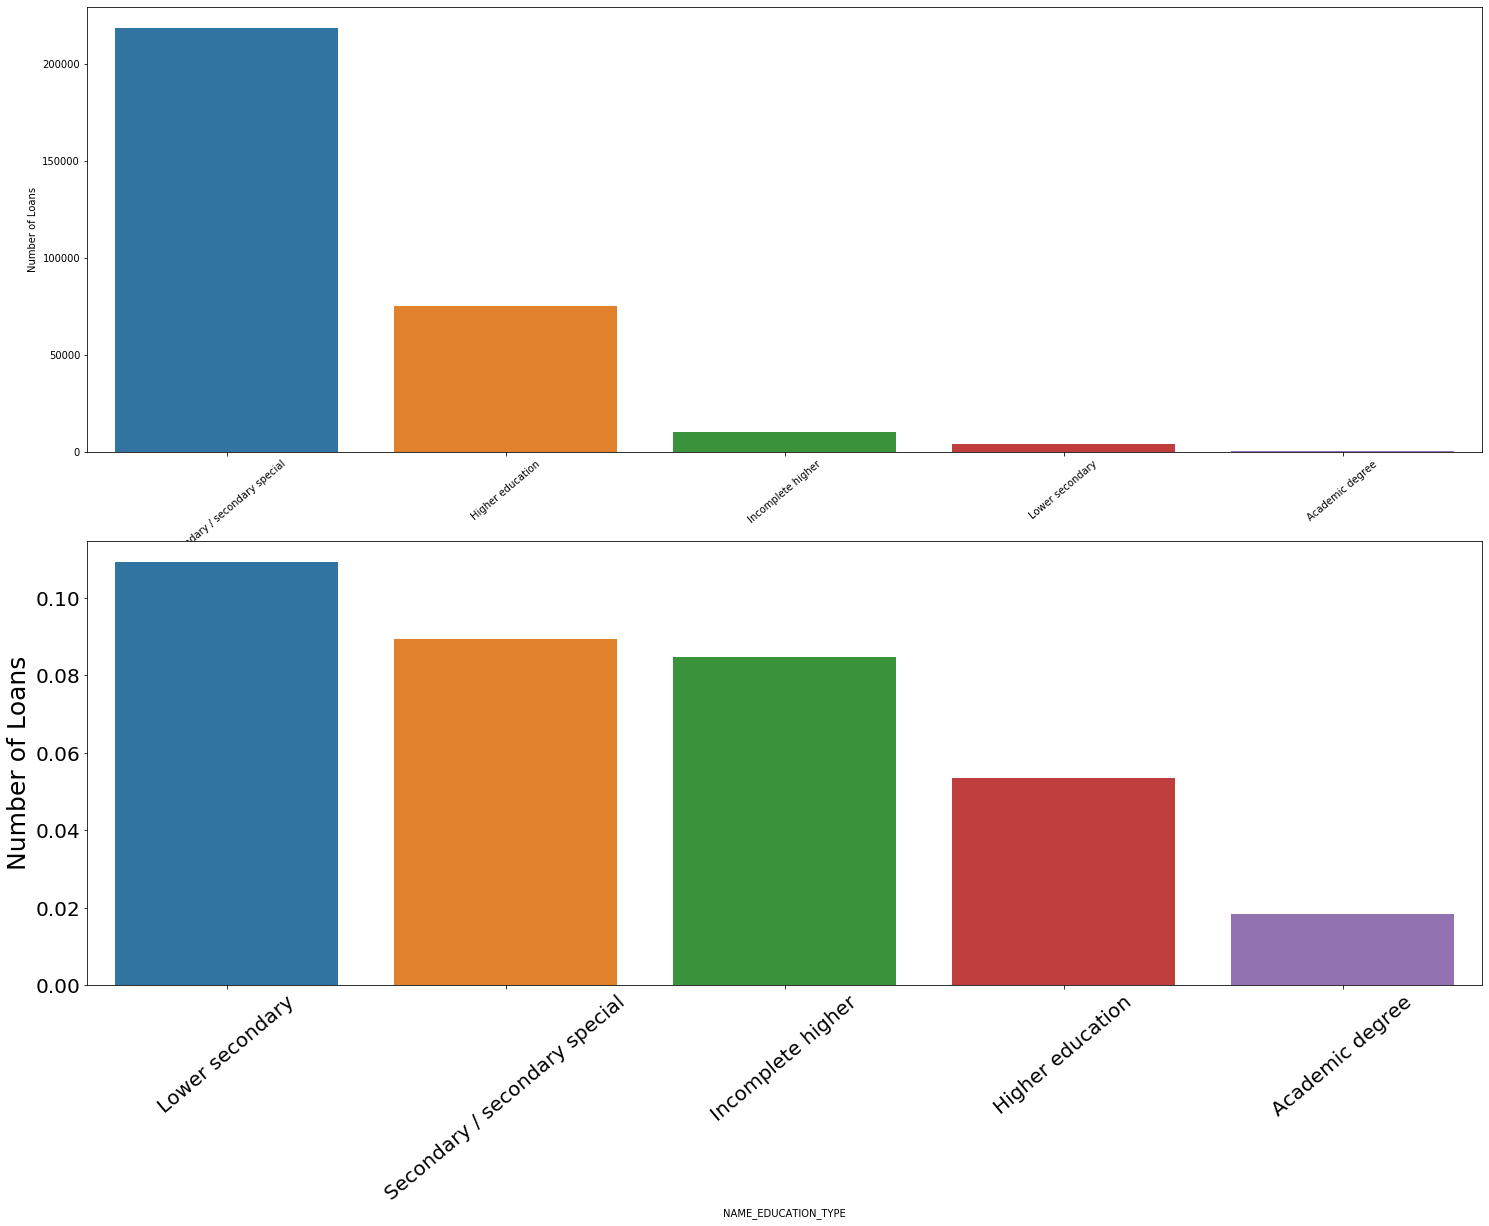

In [123]:
plot_stats('NAME_EDUCATION_TYPE', True, False)

In [124]:
#The higher the education, the better the reflexivity is obvious.

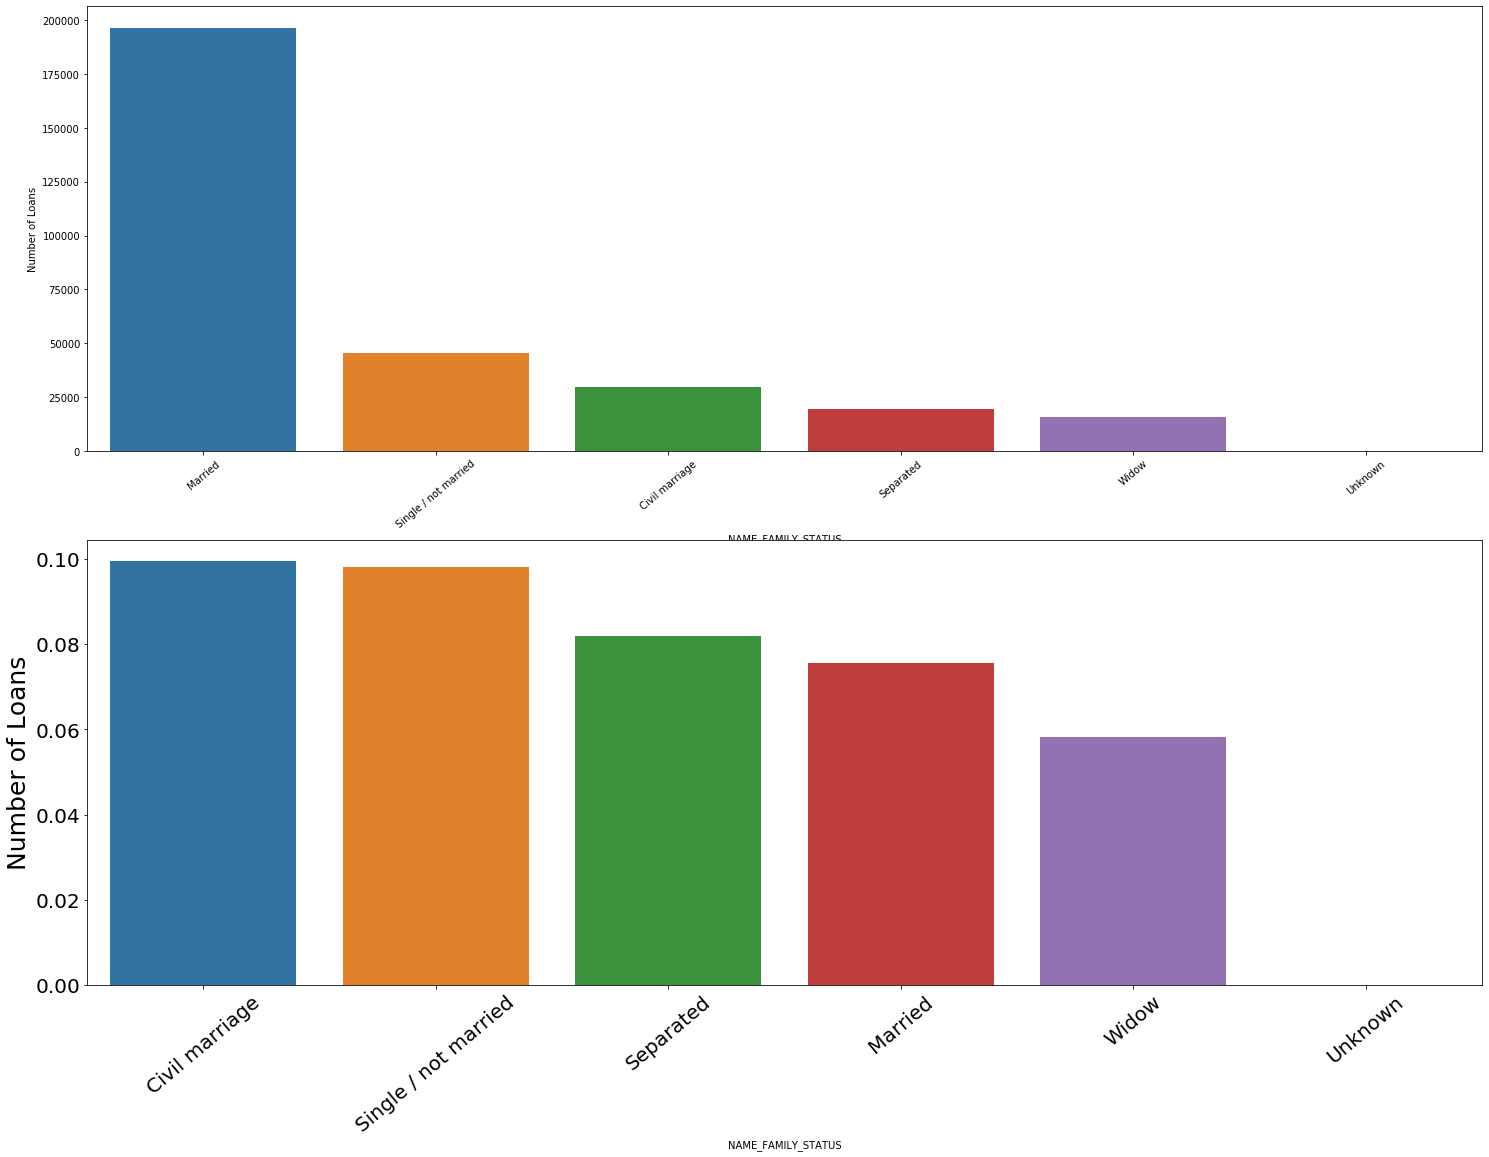

In [125]:
plot_stats('NAME_FAMILY_STATUS', True, False)

In [ ]:
#While the majority of clients are married, customers in unmarried and 
#single relationships are less risky. Widowers show minimal risk.

In [54]:
f= appl_train[appl_train['CODE_GENDER']=='F']
f_default = f[f['TARGET']==1]
f_pct_def = len[f_default/len(f)]

plt.bar(x=f,y=f_pct_def,align='center', alpha=0.5) 

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [55]:
plot_stats('OCCUPATION_TYPE', True, False)

NameError: name 'plot_stats' is not defined

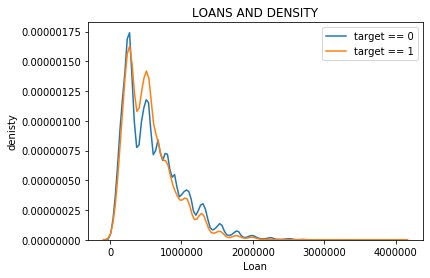

In [56]:
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')


sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

plt.xlabel('Loan'); plt.ylabel('denisty'); plt.title('LOANS AND DENSITY');


ValueError: could not convert string to float: 'F'

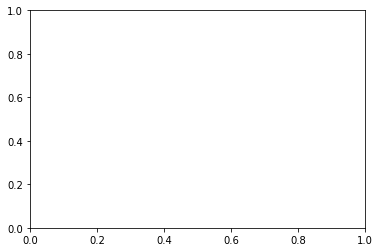

In [57]:
sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 0, 'CODE_GENDER'], label = 'target == 0')


sns.kdeplot(appl_train.loc[appl_train['TARGET'] == 1, 'CODE_GENDER'], label = 'target == 1')

plt.xlabel('Loan'); plt.ylabel('denisty'); plt.title('LOANS AND DENSITY');

In [58]:
a = pos[pos['SK_ID_PREV']==1077629]

In [59]:
sort1 = a.sort_values('MONTHS_BALANCE',inplace=True,ascending=True)

/Users/adelaelezaj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
a.head(40)
a.drop(columns=['SK_ID_PREV', 'SK_ID_CURR','SK_DPD','SK_DPD_DEF'])

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS
5014021,-32,42.0,42.0,Active
7256100,-31,42.0,41.0,Active
5014866,-30,42.0,40.0,Active
3947499,-29,42.0,39.0,Active
3407081,-28,42.0,38.0,Active
4577478,-27,42.0,37.0,Active
2166425,-26,42.0,36.0,Active
624254,-25,42.0,35.0,Active
4677109,-24,42.0,34.0,Active
507230,-23,42.0,33.0,Active


In [61]:
b = pos[pos['SK_ID_PREV']==1134389]

In [62]:
b.sort_values('MONTHS_BALANCE',inplace=True,ascending=True)

/Users/adelaelezaj/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
b.drop(columns=['SK_ID_PREV', 'SK_ID_CURR','SK_DPD','SK_DPD_DEF'])

,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS
1697943,-95,4.0,4.0,Active
4271109,-94,4.0,3.0,Active
2804929,-93,4.0,2.0,Active
663283,-92,4.0,1.0,Active
2456592,-91,4.0,0.0,Active
3243090,-90,4.0,0.0,Active
5170659,-89,4.0,0.0,Active
4384197,-88,4.0,0.0,Active
4658587,-87,4.0,0.0,Completed


In [64]:
b.head(40)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1697943,1134389,307445,-95,4.0,4.0,Active,0,0
4271109,1134389,307445,-94,4.0,3.0,Active,15,15
2804929,1134389,307445,-93,4.0,2.0,Active,13,13
663283,1134389,307445,-92,4.0,1.0,Active,14,14
2456592,1134389,307445,-91,4.0,0.0,Active,14,14
3243090,1134389,307445,-90,4.0,0.0,Active,45,45
5170659,1134389,307445,-89,4.0,0.0,Active,75,75
4384197,1134389,307445,-88,4.0,0.0,Active,0,0
4658587,1134389,307445,-87,4.0,0.0,Completed,0,0


In [151]:
import statsmodels.formula.api as smf

In [152]:
formula = 'TARGET ~ EXT_SOURCE_1 + EXT_SOURCE_2 + EXT_SOURCE_3 + DAYS_BIRTH + DAYS_EMPLOYED +REGION_RATING_CLIENT_W_CITY + REG_CITY_NOT_WORK_CITY + DAYS_ID_PUBLISH + REGION_RATING_CLIENT+ AMT_GOODS_PRICE + C(NAME_CONTRACT_TYPE)+ C(CODE_GENDER)'

fitted_model = smf.logit(formula=formula, data=appl_train).fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.231676
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 TARGET   No. Observations:               109490
Model:                          Logit   Df Residuals:                   109476
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.1136
Time:                        18:19:25   Log-Likelihood:                -25366.
converged:                       True   LL-Null:                       -28616.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.2376      0.084     -2.818      0.005      -0.403      -0.072
C(NAME_CONTRACT_TYPE)[T.Revolving loans]    -0.5054      0.049    -10.333      0.000      -0.601      -0.410
C(CODE_GENDER)[T.M]                          0.0236      0.027      0.887      0.375      -0.029       0.076
C(CODE_GENDER)[T.XNA]                      -60.5568   4.13e+13  -1.47e-12      1.000   -8.09e+13    8.09e+13
EXT_SOURCE_1                                -2.5994      0.079    -32.996      0.000      -2.754      -2.445
EXT_SOURCE_2                                -1.8343      0.063    -29.155      0.000      -1.958      -1.711
EXT_SOURCE_3                                -2.8151      0.063    -44.406      0.000      -2.939      -2.691
DAYS_BIRTH                               -6.713e-05   4.11e-06    -16.336      0.000   -7.52e-05   -5.91e-05
DAYS_EMPLOYED                                8.7874      0.986      8.915      0.000       6.855      10.719
REGION_RATING_CLIENT_W_CITY                  0.3042      0.083      3.650      0.000       0.141       0.468
REG_CITY_NOT_WORK_CITY                       0.0308      0.027      1.127      0.260      -0.023       0.084
DAYS_ID_PUBLISH                           3.871e-05   8.38e-06      4.621      0.000    2.23e-05    5.51e-05
REGION_RATING_CLIENT                        -0.1336      0.083     -1.614      0.107      -0.296       0.029
AMT_GOODS_PRICE                          -5.453e-08   3.63e-08     -1.501      0.133   -1.26e-07    1.67e-08
============================================================================================================
"""

In [ ]:
appl_train['AMT_GOODS_PRICE']=appl_train['AMT_GOODS_PRICE'].fillna(0)

In [ ]:
hc_train = pd.read_csv('/Users/adelaelezaj/desktop/Final_Capstone/raw_data/homecredit_table.csv')

In [ ]:
hc_train.head()

In [ ]:
null_val = hc_train.isnull().sum
percent = (100 * hc_train.isnull().sum() / len(hc_train)).sort_values(ascending=False)
percent.head(70)

In [67]:
corr = final.corr()['target'].sort_values()
top10_corr = pd.concat([corr[:15], corr[-15:]])
top10_corr

NameError: name 'final' is not defined

In [68]:
hc_train.flag_document_3.isnull().sum()

NameError: name 'hc_train' is not defined

In [69]:
formula = 'target ~ ext_source_1 + ext_source_2 + ext_source_3 + days_birth + days_employed + days_last_phone_change + region_rating_client+ region_rating_client_w_city + F + credit_term + flag_document_3 + amt_goods_price'

fitted_model = smf.logit(formula=formula, data=final).fit()
fitted_model.summary()

NameError: name 'final' is not defined

In [70]:
hc_train['total_credit'] = hc_train['total_credit'].fillna(0)

NameError: name 'hc_train' is not defined

In [71]:
dummies = pd.get_dummies(hc_train.code_gender)

NameError: name 'hc_train' is not defined

In [72]:
merged = pd.concat([hc_train, dummies], axis ='columns')
merged

NameError: name 'hc_train' is not defined

In [73]:
final = merged.drop(['code_gender', 'M'], axis = 'columns')
final

NameError: name 'merged' is not defined

In [74]:
#Removing columns with missing values more than 40%
missing_cols = [ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"]

data_new  = appl_train[[i for i in hc_train.columns if i not in missing_cols]]

NameError: name 'hc_train' is not defined

In [75]:
#Separating numberical and categorical columns
obj_dtypes = [i for i in data_new.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in data_new.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

NameError: name 'data_new' is not defined

In [76]:
#MISSING values treatment
cols = ["DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE",
        "OBS_60_CNT_SOCIAL_CIRCLE","NAME_TYPE_SUITE","CNT_FAM_MEMBERS",
       "DAYS_LAST_PHONE_CHANGE","DAYS_LAST_PHONE_CHANGE"]
for i in cols :
    data_new[i]  = data_new[i].fillna(data_new[i].mode()[0])

NameError: name 'data_new' is not defined

Text(0, 0.5, 'Count')

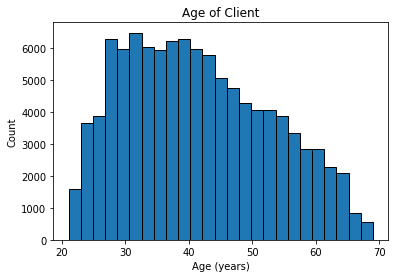

In [77]:
plt.hist(m['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

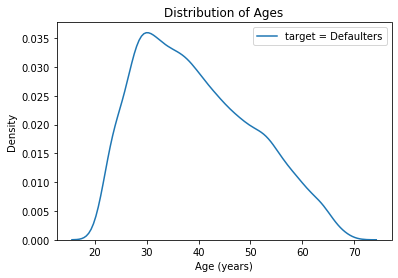

In [78]:
sns.kdeplot(m.loc[appl_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target = Defaulters')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');


In [127]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = m[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of Loans': temp.values})
    cat_perc = m[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25,14))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,18))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of Loans",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=40)
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=40)
    plt.ylabel('Number of Loans', fontsize=25)
    plt.tick_params(axis='both', which='major', labelsize=20)

    plt.show();

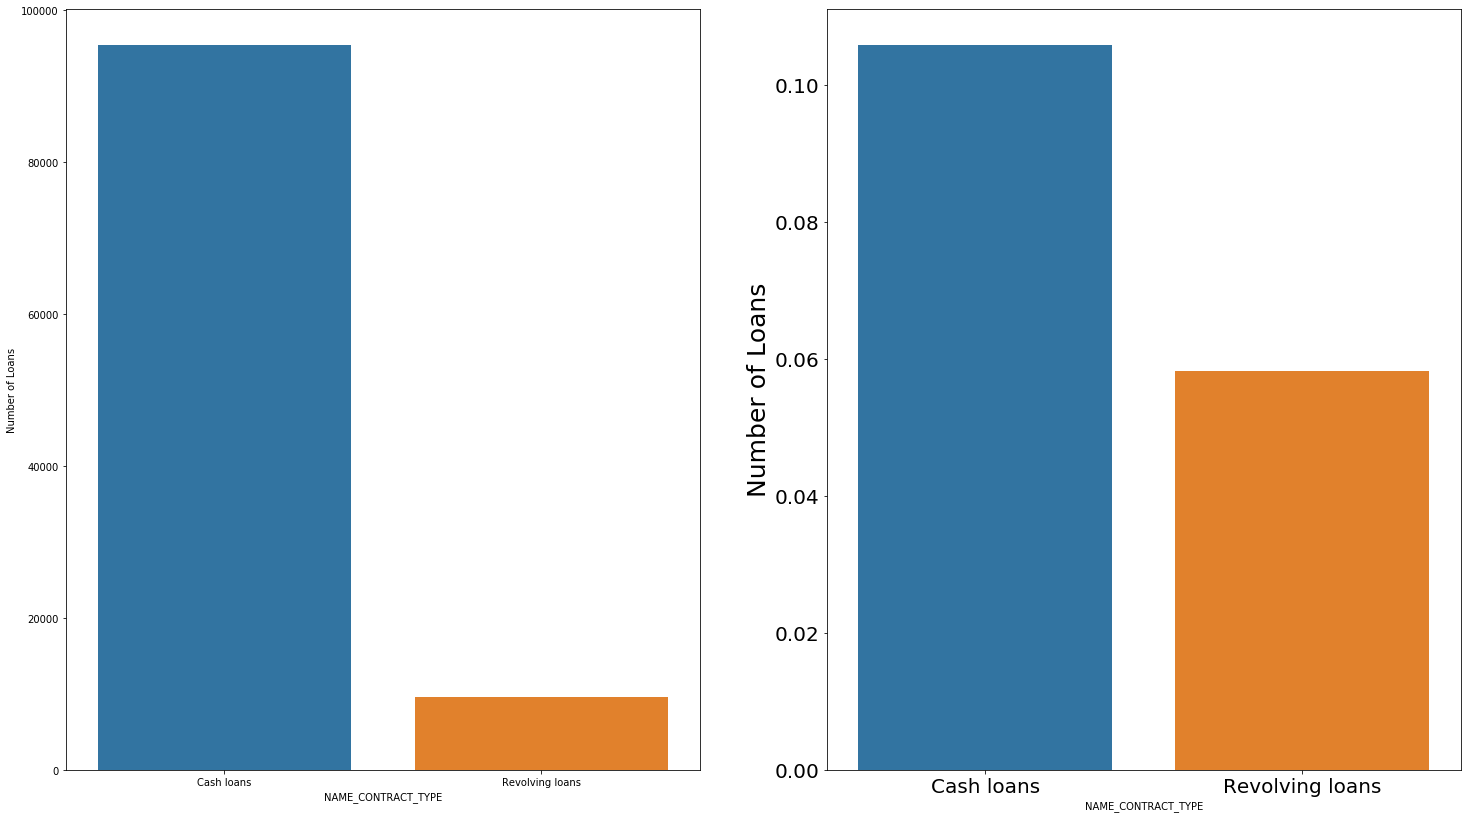

In [128]:
plot_stats('NAME_CONTRACT_TYPE')

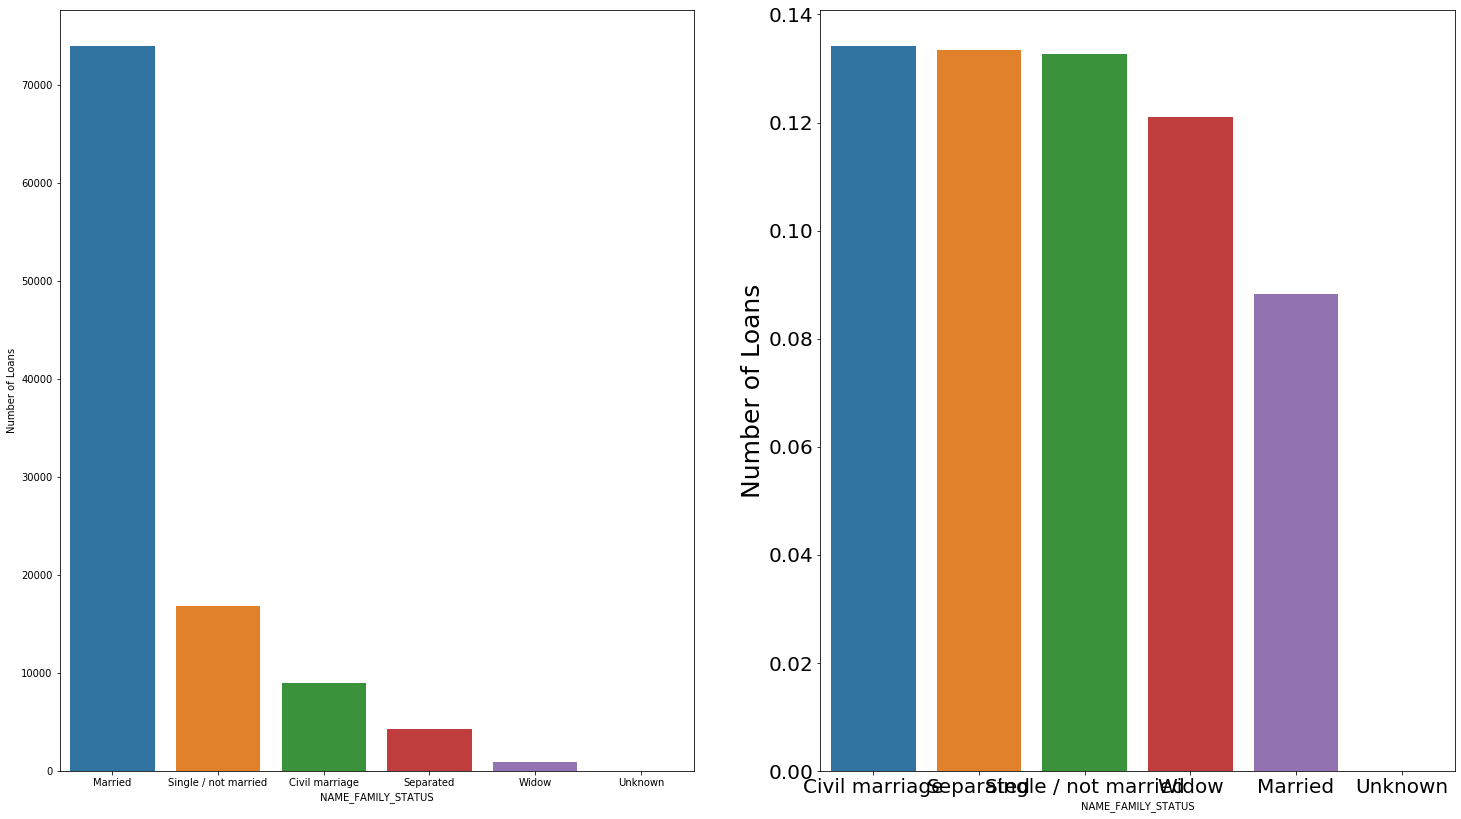

In [129]:
plot_stats('NAME_FAMILY_STATUS')

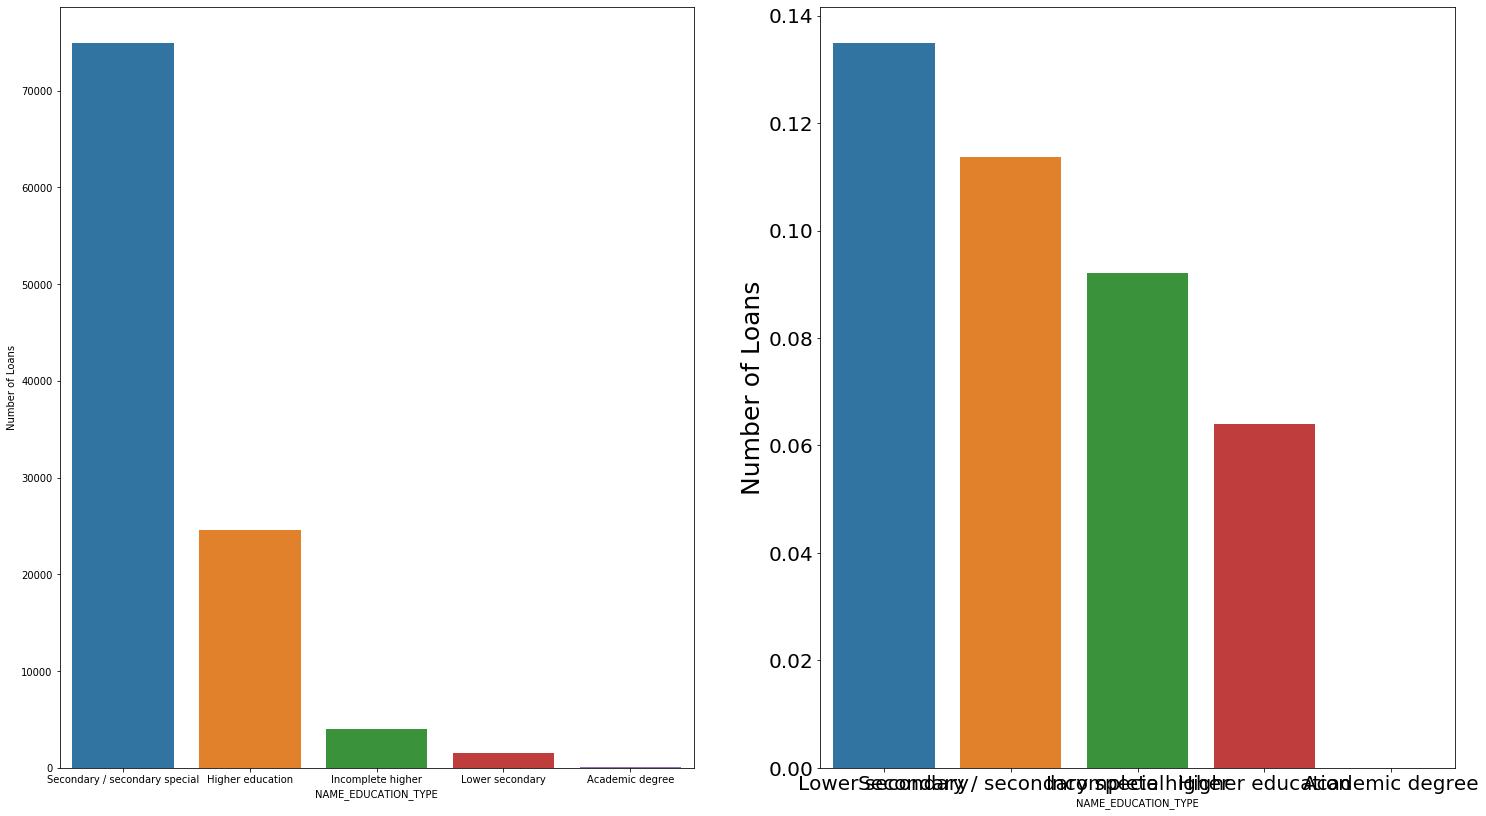

In [132]:
plot_stats('NAME_EDUCATION_TYPE')

In [140]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = m[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = m[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [141]:
def plot_distribution(var):
    
    i = 0
    t1 = m.loc[m['TARGET'] != 0]
    t0 = m.loc[m['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

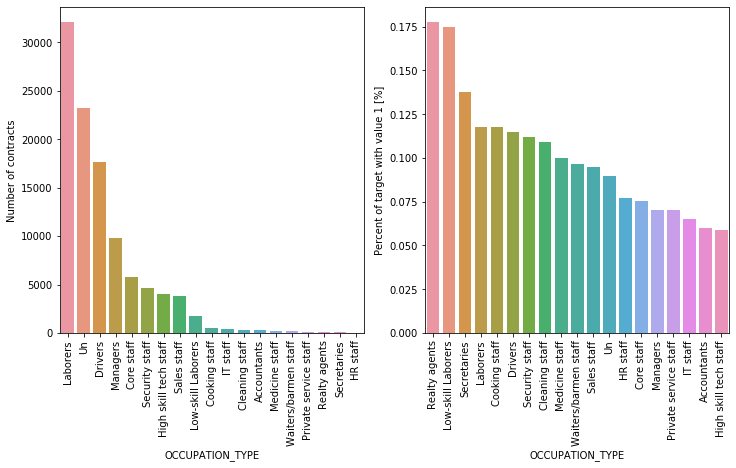

In [144]:
plot_stats('OCCUPATION_TYPE',True, True)

In [150]:
plot_stats('EDUCATION',True, True)

KeyError: 'EDUCATION'